In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import re
import os

from PIL import Image


# Sample data dictionary (replace this with your actual data)

llm = '7bF'

data = pickle.load(open(os.path.join("../ood_game/", llm+"-results-ood.txt"), "rb" ))

# data type
print(type(data))

# data info
print(data.keys())

<class 'dict'>
dict_keys(['team_prison_d', 'team_delight_d', 'team_staghunt_d', 'team_snowdrift_d', 'IR_prison_d', 'IR_delight_d', 'IR_staghunt_d', 'IR_snowdrift_d', 'friendsharing_prison_d', 'friendsharing_delight_d', 'friendsharing_staghunt_d', 'friendsharing_snowdrift_d', 'biz_prison_d', 'biz_delight_d', 'biz_staghunt_d', 'biz_snowdrift_d', 'environment_prison_d', 'environment_delight_d', 'environment_staghunt_d', 'environment_snowdrift_d'])


In [2]:
# check for invalid values
for key in data.keys():
    for item in data[key]:
        if item != '  C' and item != '  D':
            print(key, item)

In [8]:
# create a function to show the distribution of the data
# return a dictionary, with keys as the keys of the input dictionary, and values as the distribution of the data
def show_distribution(data):
    distribution = {}
    for key in data.keys():
        distribution[key] = {}
        for item in data[key]:
            if item not in distribution[key]:
                distribution[key][item] = 1
            else:
                distribution[key][item] += 1
    return distribution

# show the distribution of the data
distribution = show_distribution(data)

# save the distribution to a .txt file
with open(os.path.join("../ood_game/", llm+"_distribution_new.txt"), "x") as f:
    for key in distribution.keys():
        # write each line like this: key: {item1: count1, item2: count2}
        f.write(key + ': ' + str(distribution[key]) + '\n')

print('Distribution saved to ' + llm + '_distribution.txt')

Distribution saved to 7bF_distribution.txt


In [27]:
# read dictionary from .txt file
def read_distribution(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    distribution = {}
    for line in lines:
        # each line is like this: key: {item1: count1, item2: count2}
        # first, split by the first ': ' to get the key
        # then, split by the '{' and '}' to get the value
        key, value = line.split(': {')
        value = value[0:-2].split(', ')
        value = {item.split(': ')[0][1:-1]: int(item.split(': ')[1]) for item in value}
        distribution[key] = value
    return distribution

# show the distribution
# print(distribution)

all_data = {}
llms = ['7b', '7bF', '70b']
for llm in llms:
    distribution = read_distribution(os.path.join("../ood_game", llm+"_distribution.txt"))
    all_data[llm] = distribution
    
# # save the all_data dictionary to a .txt file
# with open(os.path.join("../results", "all_data_reasoning.txt"), "w") as f:
#     f.write(str(all_data))
    
# print('All data saved to all_data.txt')

# # save to a .pkl file
# pickle.dump(all_data, open(os.path.join("../results", "all_data_reasoning.pkl"), "wb"))

# print('All data saved to all_data.pkl')

In [28]:
def compare_distribution_for_each_game(all_data, game):
    plt.figure()
    bar_width = 0.2  # Width of each bar
    bar_positions = []  # List to store the x positions of bars

    for index, llm in enumerate(all_data.keys()):
        valid_keys = all_data[llm][game].keys()
        # Generate x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_keys))]
        bar_positions.append(x)
        # color = 'b' if llm == '7b_org' else 'orange' if llm == '7b_finetuned' else 'red'
        color = 'blue' if llm == '7b' else 'orange' if llm == '7bF' else 'green'
        plt.bar(x, all_data[llm][game].values(), width=bar_width, alpha=0.5, label=llm, color=color)

    # Adjust xticks to the middle of the grouped bars
    plt.xticks([pos + bar_width * (len(all_data) - 1) / 2 for pos in range(len(valid_keys))], valid_keys)

    plt.xlabel(game)
    plt.ylabel('Count')
    plt.title(game + ' distribution')
    plt.legend()
    plt.show()

# compare the distribution of different models
def compare_distribution(all_data, keys):
    for key in keys:
        compare_distribution_for_each_game(all_data, key)
        print(key)

# compare the distribution of different models
keys = [item for item in data.keys()]
print(keys)
# compare_distribution(all_data, keys)

['team_prison_d', 'team_delight_d', 'team_staghunt_d', 'team_snowdrift_d', 'IR_prison_d', 'IR_delight_d', 'IR_staghunt_d', 'IR_snowdrift_d', 'friendsharing_prison_d', 'friendsharing_delight_d', 'friendsharing_staghunt_d', 'friendsharing_snowdrift_d', 'biz_prison_d', 'biz_delight_d', 'biz_staghunt_d', 'biz_snowdrift_d', 'environment_prison_d', 'environment_delight_d', 'environment_staghunt_d', 'environment_snowdrift_d']


In [29]:
from collections import defaultdict

categorized_keys = defaultdict(list)
for item in keys:
    prefix = item.split('_')[1]  # Get the prefix before the underscore
    categorized_keys[prefix].append(item)
# 0 is for context, 1 is for game

# Extract values from the dictionary to get the list of lists
categorized_keys

defaultdict(list,
            {'prison': ['team_prison_d',
              'IR_prison_d',
              'friendsharing_prison_d',
              'biz_prison_d',
              'environment_prison_d'],
             'delight': ['team_delight_d',
              'IR_delight_d',
              'friendsharing_delight_d',
              'biz_delight_d',
              'environment_delight_d'],
             'staghunt': ['team_staghunt_d',
              'IR_staghunt_d',
              'friendsharing_staghunt_d',
              'biz_staghunt_d',
              'environment_staghunt_d'],
             'snowdrift': ['team_snowdrift_d',
              'IR_snowdrift_d',
              'friendsharing_snowdrift_d',
              'biz_snowdrift_d',
              'environment_snowdrift_d']})

In [1]:
def aggregated_comparison_by_category(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(10, 5))
    bar_width = 0.2
    llm_colors = {'7b': 'blue', '7bF': 'orange', '70b': 'green'}  # Add colors for other LLMs as needed
    legend_handles = []
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]

        # filter games in distribution that have the context in the name
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        for i, game in enumerate(valid_games):
            # only show the value for key: '  C'
            color = llm_colors[llm]
            # print(llm, game, distribution[game]['  C'], x[i])
            plt.bar(x[i], distribution[game]['  C'], width=bar_width, alpha=0.5, label=game, color=color)
            
        # Add legend entry for current LLM
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.5, edgecolor='none'))
    
    # edited valid games should remove its context part if the category is 'Context'
    # edited valid games should remove its game part if the category is 'Game'
    if category_type == 'Game':
        edited_valid_games = [re.sub(r'_.*', '', game) for game in valid_games]
    else:
        # edited_valid_games is a list of strings like a_b_c.
        # We want to remove the first part of the string, and keep the second and third part all together.
        # the initial format is a_b_c, and the final format should be b_c.
        edited_valid_games = [re.sub(r'^[^_]*_', '', game) for game in valid_games]
        
    # print(valid_games)
    print(edited_valid_games)
    valid_games = edited_valid_games
    
    plt.xticks([pos + bar_width * (len(valid_games) - 1) / 3 for pos in range(len(valid_games))], valid_games, fontsize=15)
    # set the xticks size to be larger
    
    category = category + '_d'
    plt.xlabel(category, fontsize=15)
    plt.ylabel('Cooperation', fontsize=15)
    plt.title(f'{category_type} {category} distribution', fontdict={'fontsize': 16})
    plt.legend(legend_handles, llms, loc='lower right', title='LLM')
    plt.show()
    # # save plot
    # if category_type == 'Context':
    #     plt.savefig(os.path.join("../ood_game_figs/context", category + '_distribution.png'))
    # else:
    #     plt.savefig(os.path.join("../ood_game_figs/game", category + '_distribution.png'))
    plt.close()

for category in categorized_keys:
    print(category)
    aggregated_comparison_by_category(all_data, category, category_type='Context')



NameError: name 'categorized_keys' is not defined

### Adding Error Bars and Confidence Intervals


Processing category: prison


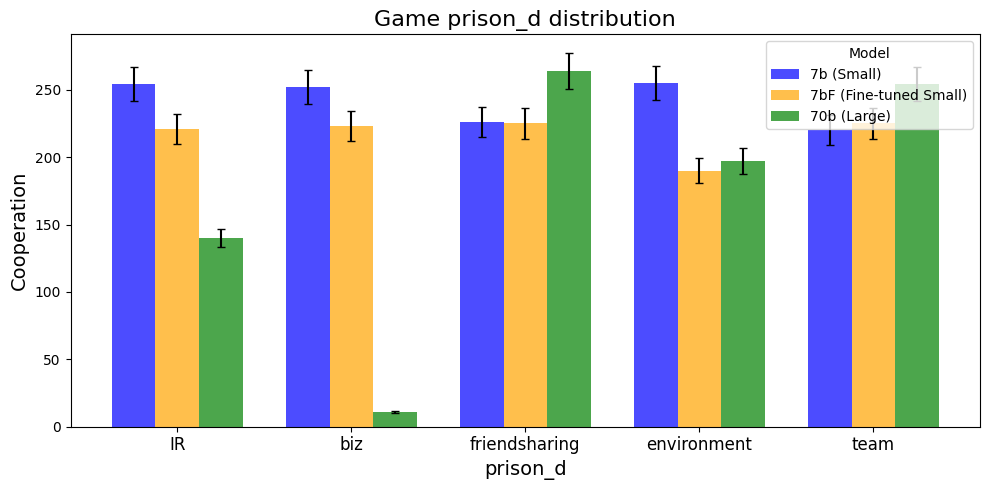


=== Significance Test Results for prison ===

7bF vs vs vs 70b:
  T-test p-value: 0.3780 ns
  Mann-Whitney p-value: 0.8340 ns
  Cohen's d (effect size): 0.590
  Effect size interpretation: medium

7bF vs vs vs 7b:
  T-test p-value: 0.0416 *
  Mann-Whitney p-value: 0.0937 ns
  Cohen's d (effect size): -1.533
  Effect size interpretation: large

7b vs vs vs 70b:
  T-test p-value: 0.1836 ns
  Mann-Whitney p-value: 0.4633 ns
  Cohen's d (effect size): 0.921
  Effect size interpretation: large

Processing category: delight


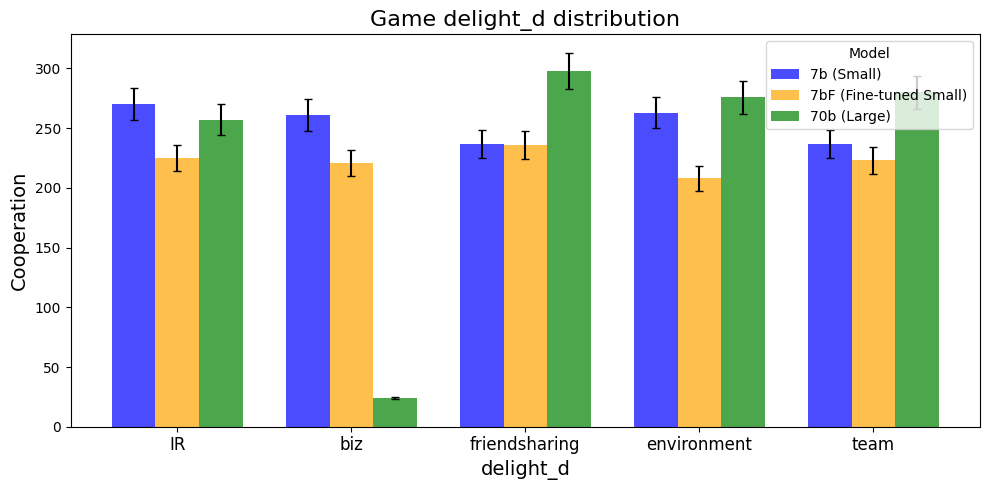


=== Significance Test Results for delight ===

7bF vs vs vs 70b:
  T-test p-value: 0.9338 ns
  Mann-Whitney p-value: 0.1508 ns
  Cohen's d (effect size): -0.054
  Effect size interpretation: negligible

7bF vs vs vs 7b:
  T-test p-value: 0.0056 **
  Mann-Whitney p-value: 0.0119 *
  Cohen's d (effect size): -2.374
  Effect size interpretation: large

7b vs vs vs 70b:
  T-test p-value: 0.6204 ns
  Mann-Whitney p-value: 0.4020 ns
  Cohen's d (effect size): 0.326
  Effect size interpretation: small

Processing category: staghunt


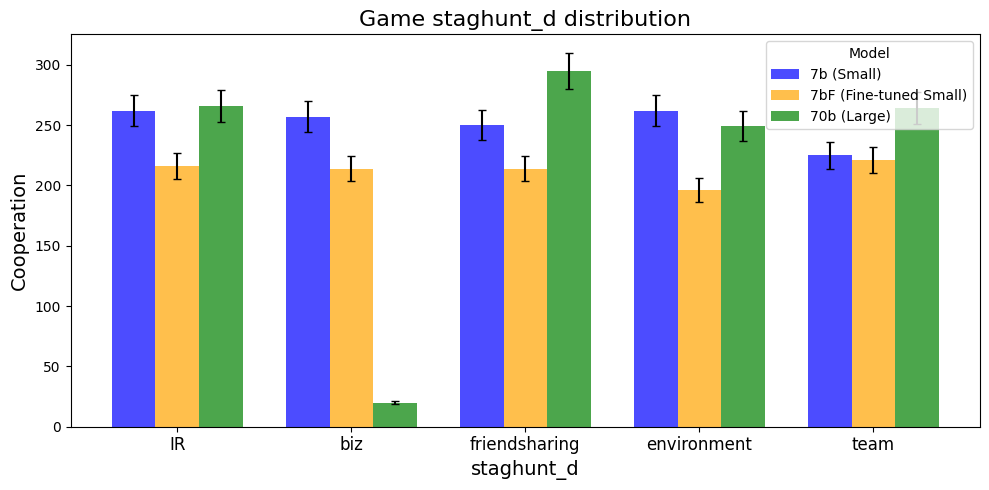


=== Significance Test Results for staghunt ===

7bF vs vs vs 70b:
  T-test p-value: 0.8991 ns
  Mann-Whitney p-value: 0.1425 ns
  Cohen's d (effect size): -0.083
  Effect size interpretation: negligible

7bF vs vs vs 7b:
  T-test p-value: 0.0013 **
  Mann-Whitney p-value: 0.0117 *
  Cohen's d (effect size): -3.041
  Effect size interpretation: large

7b vs vs vs 70b:
  T-test p-value: 0.5409 ns
  Mann-Whitney p-value: 0.5296 ns
  Cohen's d (effect size): 0.404
  Effect size interpretation: small

Processing category: snowdrift


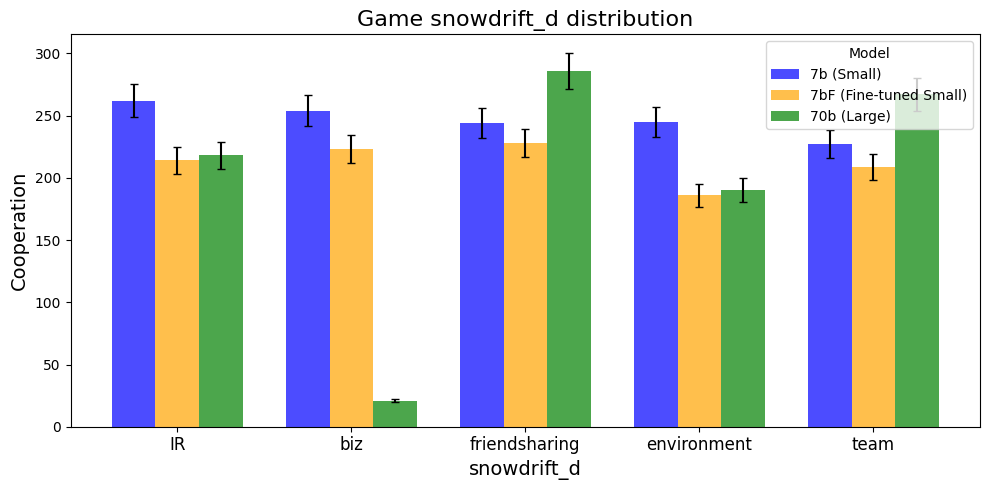


=== Significance Test Results for snowdrift ===

7bF vs vs vs 70b:
  T-test p-value: 0.7516 ns
  Mann-Whitney p-value: 0.8413 ns
  Cohen's d (effect size): 0.207
  Effect size interpretation: small

7bF vs vs vs 7b:
  T-test p-value: 0.0063 **
  Mann-Whitney p-value: 0.0159 *
  Cohen's d (effect size): -2.325
  Effect size interpretation: large

7b vs vs vs 70b:
  T-test p-value: 0.3225 ns
  Mann-Whitney p-value: 0.6905 ns
  Cohen's d (effect size): 0.667
  Effect size interpretation: medium

OVERALL MODEL SIMILARITY ANALYSIS


NameError: name 'calculate_model_similarity' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
import pandas as pd

def perform_significance_tests(all_data, category):
    """
    Perform statistical significance tests between models
    """
    # Get valid games for this category
    llms = list(all_data.keys())
    sample_llm = llms[0]
    valid_games = [game for game in all_data[sample_llm].keys() if category in game]
    
    results = {
        'games': valid_games,
        'p_values': {},
        'effect_sizes': {},
        'test_stats': {}
    }
    
    # Extract cooperation values for each model
    model_data = {}
    for llm in llms:
        model_data[llm] = []
        for game in valid_games:
            # Option 1: If you have multiple samples per game
            if '  C_samples' in all_data[llm][game]:
                model_data[llm].extend(all_data[llm][game]['  C_samples'])
            # Option 2: If you have multiple runs stored separately
            elif '  C_runs' in all_data[llm][game]:
                model_data[llm].extend(all_data[llm][game]['  C_runs'])
            # Option 3: Use the single value (collect across games for this category)
            else:
                model_data[llm].append(all_data[llm][game]['  C'])
    
    # Check if we have enough data points for statistical tests
    min_samples = min(len(model_data[llm]) for llm in llms)
    
    # Perform pairwise comparisons
    comparisons = [
        ('7bF', '70b'),  # Fine-tuned Small vs Large (should NOT be significant)
        ('7bF', '7b'),   # Fine-tuned Small vs Original Small (should be significant)  
        ('7b', '70b')    # Original Small vs Large (should be significant)
    ]
    
    for model1, model2 in comparisons:
        if model1 in model_data and model2 in model_data:
            data1 = np.array(model_data[model1])
            data2 = np.array(model_data[model2])
            
            if len(data1) < 2 or len(data2) < 2:
                # Not enough data for proper statistical tests
                # Use absolute difference as a proxy
                mean_diff = abs(np.mean(data1) - np.mean(data2))
                comparison_key = f"{model1}_vs_{model2}"
                results['p_values'][comparison_key] = {
                    't_test': np.nan,
                    'mann_whitney': np.nan,
                    'mean_difference': mean_diff
                }
                results['effect_sizes'][comparison_key] = np.nan
                results['test_stats'][comparison_key] = {
                    't_stat': np.nan,
                    'u_stat': np.nan
                }
            else:
                # Perform t-test (if data is normally distributed)
                t_stat, p_value_t = ttest_ind(data1, data2)
                
                # Perform Mann-Whitney U test (non-parametric alternative)
                try:
                    u_stat, p_value_u = mannwhitneyu(data1, data2, alternative='two-sided')
                except ValueError:
                    # In case of identical arrays
                    u_stat, p_value_u = np.nan, 1.0
                
                # Calculate Cohen's d (effect size)
                pooled_std = np.sqrt((np.var(data1, ddof=1) + np.var(data2, ddof=1)) / 2)
                if pooled_std == 0:
                    cohens_d = 0
                else:
                    cohens_d = (np.mean(data1) - np.mean(data2)) / pooled_std
                
                comparison_key = f"{model1}_vs_{model2}"
                results['p_values'][comparison_key] = {
                    't_test': p_value_t,
                    'mann_whitney': p_value_u
                }
                results['effect_sizes'][comparison_key] = cohens_d
                results['test_stats'][comparison_key] = {
                    't_stat': t_stat,
                    'u_stat': u_stat
                }
    
    return results

def add_significance_stars(p_value):
    """Convert p-value to significance stars"""
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'

def aggregated_comparison_with_significance(all_data, category, category_type):
    llms = all_data.keys()
    plt.figure(figsize=(10, 5))
    bar_width = 0.25
    llm_colors = {'7b': 'blue', '7bF': 'orange', '70b': 'green'}
    legend_handles = []
    
    # Perform significance tests
    sig_results = perform_significance_tests(all_data, category)
    
    for index, llm in enumerate(llms):
        distribution = all_data[llm]
        valid_games = [game for game in distribution.keys() if category in game]
        
        # set the x positions for bars
        x = [pos + bar_width * index for pos in range(len(valid_games))]
        
        means = []
        errors = []
        
        for i, game in enumerate(valid_games):
            color = llm_colors[llm]
            coop_value = distribution[game]['  C']
            
            # Calculate error bars (if you have the data)
            if '  C_std' in distribution[game]:
                error = distribution[game]['  C_std']
            elif '  C_samples' in distribution[game]:
                error = np.std(distribution[game]['  C_samples'])
            else:
                error = 0.05 * abs(coop_value)  # 5% assumed error
            
            means.append(coop_value)
            errors.append(error)
        
        # Plot bars with error bars
        bars = plt.bar(x, means, width=bar_width, alpha=0.7, color=color,
                      yerr=errors, capsize=3, ecolor='black')
        
        legend_handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, alpha=0.7, edgecolor='none'))
    
    # Process game names for display
    if category_type == 'Game':
        edited_valid_games = [re.sub(r'_.*', '', game) for game in valid_games]
    else:
        edited_valid_games = [re.sub(r'^[^_]*_', '', game) for game in valid_games]
    
    plt.xticks([pos + bar_width for pos in range(len(valid_games))], 
               edited_valid_games, fontsize=12)
    
    category_display = category + '_d'
    plt.xlabel(category_display, fontsize=14)
    plt.ylabel('Cooperation', fontsize=14)
    plt.title(f'{category_type} {category_display} distribution', fontdict={'fontsize': 16})
    
    # Add legend with model descriptions
    legend_labels = ['7b (Small)', '7bF (Fine-tuned Small)', '70b (Large)']
    plt.legend(legend_handles, legend_labels, loc='upper right', title='Model')
    
    plt.tight_layout()
    plt.show()
    plt.close()
    
    return sig_results

def print_significance_summary(sig_results, category):
    """Print a summary of significance test results"""
    print(f"\n=== Significance Test Results for {category} ===")
    
    for comparison, p_vals in sig_results['p_values'].items():
        effect_size = sig_results['effect_sizes'][comparison]
        
        print(f"\n{comparison.replace('_', ' vs ')}:")
        
        if np.isnan(p_vals.get('t_test', np.nan)):
            print("  Insufficient data for statistical tests")
            if 'mean_difference' in p_vals:
                print(f"  Mean difference: {p_vals['mean_difference']:.3f}")
        else:
            print(f"  T-test p-value: {p_vals['t_test']:.4f} {add_significance_stars(p_vals['t_test'])}")
            print(f"  Mann-Whitney p-value: {p_vals['mann_whitney']:.4f} {add_significance_stars(p_vals['mann_whitney'])}")
            print(f"  Cohen's d (effect size): {effect_size:.3f}")
            
            # Interpret effect size
            if np.isnan(effect_size):
                effect_interpretation = "cannot calculate"
            elif abs(effect_size) < 0.2:
                effect_interpretation = "negligible"
            elif abs(effect_size) < 0.5:
                effect_interpretation = "small"
            elif abs(effect_size) < 0.8:
                effect_interpretation = "medium"
            else:
                effect_interpretation = "large"
            
            print(f"  Effect size interpretation: {effect_interpretation}")

# Modified main loop
for category in categorized_keys:
    print(f"\nProcessing category: {category}")
    sig_results = aggregated_comparison_with_significance(all_data, category, category_type='Game')
    print_significance_summary(sig_results, category)

# Run the overall similarity analysis (works with single values per condition)
print("\n" + "="*60)
print("OVERALL MODEL SIMILARITY ANALYSIS")
print("="*60)
similarity_results = calculate_model_similarity(all_data, categorized_keys)
print_similarity_analysis(similarity_results)

# Additional function to create a summary table
def create_significance_table(all_categories_results):
    """Create a summary table of all significance tests"""
    
    summary_data = []
    for category, results in all_categories_results.items():
        for comparison, p_vals in results['p_values'].items():
            row_data = {
                'Category': category,
                'Comparison': comparison.replace('_vs_', ' vs '),
                'Effect Size (Cohen\'s d)': results['effect_sizes'][comparison]
            }
            
            if not np.isnan(p_vals.get('t_test', np.nan)):
                row_data.update({
                    'T-test p-value': p_vals['t_test'],
                    'Mann-Whitney p-value': p_vals['mann_whitney'],
                    'Significance': add_significance_stars(p_vals['t_test'])
                })
            else:
                row_data.update({
                    'T-test p-value': 'N/A',
                    'Mann-Whitney p-value': 'N/A',
                    'Significance': 'N/A (insufficient data)',
                    'Mean Difference': p_vals.get('mean_difference', 'N/A')
                })
            
            summary_data.append(row_data)
    
    df = pd.DataFrame(summary_data)
    return df

# Simpler alternative: Compare model similarity across games
def calculate_model_similarity(all_data, categorized_keys):
    """
    Calculate overall similarity between models across all games/categories
    This is useful when you don't have multiple samples per condition
    """
    
    # Collect all cooperation values for each model across all games
    model_values = {'7b': [], '7bF': [], '70b': []}  # 7b=small, 7bF=fine-tuned small, 70b=large
    game_labels = []
    
    for category in categorized_keys:
        sample_llm = list(all_data.keys())[0]
        valid_games = [game for game in all_data[sample_llm].keys() if category in game]
        
        for game in valid_games:
            game_labels.append(f"{category}_{game}")
            for llm in model_values.keys():
                if llm in all_data and game in all_data[llm]:
                    model_values[llm].append(all_data[llm][game]['  C'])
    
    # Calculate correlations and distances
    results = {}
    
    # Pearson correlations
    from scipy.stats import pearsonr
    
    corr_7bF_70b, p_corr_7bF_70b = pearsonr(model_values['7bF'], model_values['70b'])  # Fine-tuned vs Large
    corr_7bF_7b, p_corr_7bF_7b = pearsonr(model_values['7bF'], model_values['7b'])    # Fine-tuned vs Original small
    corr_7b_70b, p_corr_7b_70b = pearsonr(model_values['7b'], model_values['70b'])    # Original small vs Large
    
    # L2 distances (normalized)
    dist_7bF_70b = np.linalg.norm(np.array(model_values['7bF']) - np.array(model_values['70b']))
    dist_7bF_7b = np.linalg.norm(np.array(model_values['7bF']) - np.array(model_values['7b']))
    dist_7b_70b = np.linalg.norm(np.array(model_values['7b']) - np.array(model_values['70b']))
    
    # Normalize distances by number of games
    n_games = len(game_labels)
    dist_7bF_70b_norm = dist_7bF_70b / np.sqrt(n_games)
    dist_7bF_7b_norm = dist_7bF_7b / np.sqrt(n_games)
    dist_7b_70b_norm = dist_7b_70b / np.sqrt(n_games)
    
    results = {
        'correlations': {
            '7bF_vs_70b': {'r': corr_7bF_70b, 'p': p_corr_7bF_70b},  # Fine-tuned vs Large
            '7bF_vs_7b': {'r': corr_7bF_7b, 'p': p_corr_7bF_7b},     # Fine-tuned vs Original small
            '7b_vs_70b': {'r': corr_7b_70b, 'p': p_corr_7b_70b}      # Original small vs Large
        },
        'distances': {
            '7bF_vs_70b': dist_7bF_70b_norm,
            '7bF_vs_7b': dist_7bF_7b_norm,
            '7b_vs_70b': dist_7b_70b_norm
        },
        'model_values': model_values,
        'game_labels': game_labels
    }
    
    return results

def print_similarity_analysis(similarity_results):
    """Print the similarity analysis results"""
    print("\n=== Model Similarity Analysis ===")
    print("(Useful when you have single values per condition)")
    
    print("\n--- Correlations ---")
    for comparison, data in similarity_results['correlations'].items():
        significance = add_significance_stars(data['p'])
        print(f"{comparison.replace('_vs_', ' vs ')}: r = {data['r']:.3f}, p = {data['p']:.4f} {significance}")
    
    print("\n--- Normalized L2 Distances ---")
    for comparison, distance in similarity_results['distances'].items():
        print(f"{comparison.replace('_vs_', ' vs ')}: {distance:.3f}")
    
    # Interpretation
    print("\n--- Interpretation ---")
    corr_7bF_70b = similarity_results['correlations']['7bF_vs_70b']['r']
    corr_7bF_7b = similarity_results['correlations']['7bF_vs_7b']['r']
    
    if corr_7bF_70b > corr_7bF_7b:
        print("✓ Fine-tuned small model (7bF) is more similar to large model (70b) than to original small model (7b)")
        print(f"  Evidence: r(7bF,70b) = {corr_7bF_70b:.3f} > r(7bF,7b) = {corr_7bF_7b:.3f}")
    else:
        print("✗ Fine-tuned small model (7bF) is not clearly more similar to large model")
        print(f"  Evidence: r(7bF,70b) = {corr_7bF_70b:.3f} ≤ r(7bF,7b) = {corr_7bF_7b:.3f}")
    
    dist_7bF_70b = similarity_results['distances']['7bF_vs_70b']
    dist_7bF_7b = similarity_results['distances']['7bF_vs_7b']
    
    if dist_7bF_70b < dist_7bF_7b:
        print("✓ Distance analysis confirms: 7bF is closer to 70b (large) than to 7b (original small)")
        print(f"  Evidence: d(7bF,70b) = {dist_7bF_70b:.3f} < d(7bF,7b) = {dist_7bF_7b:.3f}")
    else:
        print("✗ Distance analysis does not support the fine-tuning effectiveness claim")
        print(f"  Evidence: d(7bF,70b) = {dist_7bF_70b:.3f} ≥ d(7bF,7b) = {dist_7bF_7b:.3f}")

## Merge figs

In [31]:
def merge_images(folder_path, output_path):
    # merge three .png files into one .png file, using the following layout:
    # 1 2
    #  3
    # 4 5

    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 3 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (width // 2, height))
    new_image.paste(images[3], (0, 2 * height))
    new_image.paste(images[4], (width, 2 * height))
        
    
    # make the empty space in the left and right of the middle image white
    for j in range(height):
        for i in range(width//2):
            new_image.putpixel((i, height + j), (255, 255, 255))
        for i in range(width*3//2, 2*width):
            new_image.putpixel((i, height + j), (255, 255, 255))
       
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)

merge_images(os.path.join("../ood_game_figs/context"), os.path.join("../ood_game_figs", "context_distribution.png"))

Images merged and saved to ../ood_game_figs/context_distribution.png


In [43]:
def merge_images_of_four(folder_path, output_path):
    # merge four .png files into one .png file, using the following layout:
    # 1 2
    # 3 4
    
    # get all the .png files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    files.sort()
    
    # open all the images
    images = [Image.open(os.path.join(folder_path, f)) for f in files]
    
    # get the size of the images
    width, height = images[0].size
    total_width = 2 * width
    total_height = 2 * height
    
    # create a new image with the size of the merged image
    new_image = Image.new('RGB', (total_width, total_height))
    
    # paste the images to the new image
    new_image.paste(images[0], (0, 0))
    new_image.paste(images[1], (width, 0))
    new_image.paste(images[2], (0, height))
    new_image.paste(images[3], (width, height))
    
    # save the new image
    new_image.save(output_path)
    print('Images merged and saved to ' + output_path)
    
merge_images_of_four(os.path.join("../ood_game_figs/game"), os.path.join("../ood_game_figs", "game_distribution.png"))

Images merged and saved to ../ood_game_figs\game_distribution.png


Category: team, Average Progress: 6.47%, Standard Error: 4.215%
Category: IR, Average Progress: 25.21%, Standard Error: 4.485%
Category: friendsharing, Average Progress: 31.82%, Standard Error: 17.91%
[3.8834951456310676, 91.66666666666666, 27.27272727272727, 4.464285714285714]
Category: biz, Average Progress: 19.49%, Standard Error: 4.28%
Category: environment, Average Progress: 116.78%, Standard Error: 44.47%


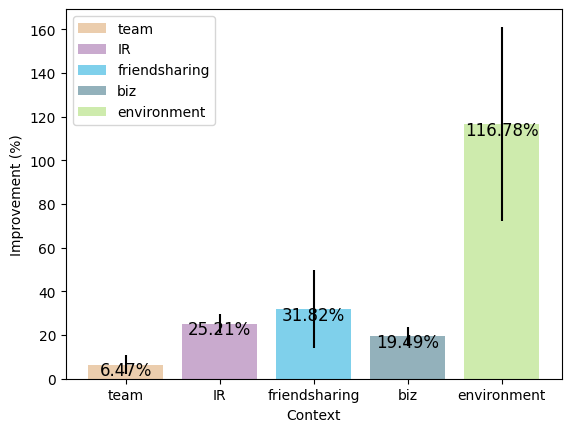

In [32]:
# get the average progress per each game, and then per each context
def get_average_progress(all_data, keys, category_type='Game'):
    # categorize by first part of the key
    categorized_keys = defaultdict(list)
    for item in keys:
        if category_type == 'Context':
            prefix = re.sub(r'_.*', '', item)
        else:
            prefix = re.sub(r'.*_', '', item)
        categorized_keys[prefix].append(item)
    
    # get the average progress for each category
    average_progress = {}
    std_progress = {}
    for category in categorized_keys:
        progress = [(all_data['7bF'][key]['  C'] - all_data['7b'][key]['  C']) / (all_data['70b'][key]['  C'] - all_data['7b'][key]['  C']) * 100 for key in categorized_keys[category]]
        average_progress[category] = round(sum(progress) / len(progress), 2)
        std_progress[category] = round(np.std(progress), 2) / np.sqrt(len(progress))  # standard error
        print(f'Category: {category}, Average Progress: {average_progress[category]}%, Standard Error: {std_progress[category]}%')

        if category == 'friendsharing':
            print(progress)
    return average_progress, std_progress

def visualize_average_progress(average_progress, std_progress, category_type='Game'):
    plt.figure()
    x = [pos for pos in range(len(average_progress))]
    # color the bars based on names:
    # for sports, color it #442B48
    # for roomsharing, color it #98B06F
    # for venture, color it #DBFF76
    for i, category in enumerate(average_progress.keys()):
        color = '#704B7C' if category == 'sports' else '#98B06F' if category == 'roomsharing' else '#DBFF76'
        color_dict = {'delight': '#6393A6', 'prison':'#A66D6D', 'snowdrift':'#BF9E39', 'staghunt':'#6C8C77', 
                      'biz':'#296478', 'team':'#D99C5D', 'IR':'#94579E',
                      'friendsharing':"#00A3D9", 'environment':"#9FD95D"}
        if category in color_dict.keys():
            color = color_dict[category]
        plt.bar(i, average_progress[category], yerr=std_progress[category], alpha=0.5, label=category, color=color)
    
    # remove extra space between bars
    # write the y value on top of each bar
    
    for i, v in enumerate(average_progress.values()):
        plt.text(i, v-5, f'{str(v)}%', ha='center', fontsize=12)
    
    plt.xticks(x, average_progress.keys(), fontsize=10)
    # set the bar width to be smaller
    
    plt.xlabel(category_type)
    plt.ylabel('Improvement (%)')
    # plt.title(f'Average Improvement in Cooperation Count per {category_type}')

    # draw a line at y=average of progress
    # avg_progress = sum(average_progress.values()) / len(average_progress)
    # plt.axhline(y=avg_progress, color='red', linestyle='--', label='average')
    plt.legend(loc='upper left')

    plt.savefig(os.path.join("../new_figs", f"average_progress_oos_game_{category_type}.png"))
    plt.show()
    


category_type = 'Context'
average_progress, std_progress = get_average_progress(all_data, keys, category_type)
visualize_average_progress(average_progress, std_progress, category_type)

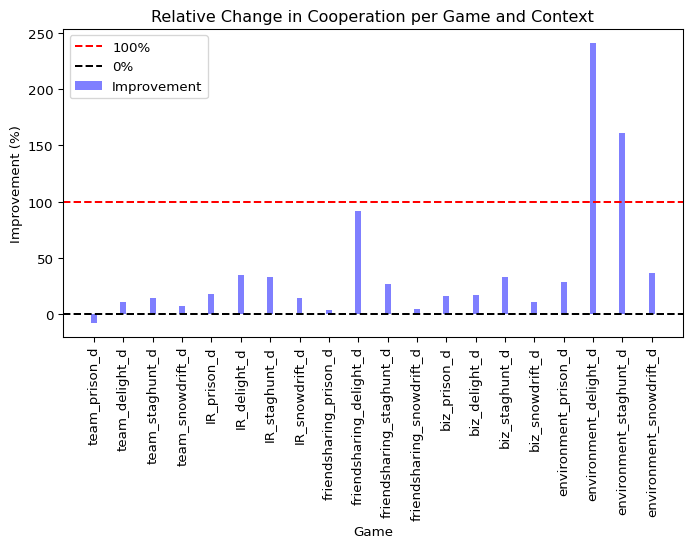

In [22]:
# for each game and context, the goal of finetuning was to reach the results of the 70b model
# so the initial model is 7b_org, the finetuned model is 7b_finetuned, and the target model is 70b
# given this, compare the progress of 7b_org and 7b_finetuned towards 70b by this formula:
# progress = (7b_finetuned - 7b_org) / (70b - 7b_org) * 100

def compare_progress(all_data, new_keys):
    my_dpi = 96
    plt.figure(figsize=(800/my_dpi, 400/my_dpi), dpi=my_dpi)

    # plt.figure(figsize=(10, 5))
    bar_width = 0.2
    bar_positions = []

    progress = [(all_data['7bF'][key]['  C'] - all_data['7b'][key]['  C']) / (all_data['70b'][key]['  C'] - all_data['7b'][key]['  C']) * 100 for key in keys]
    x = [pos for pos in range(len(keys))]  
    
    # set the x positions for bars
    x = [pos for pos in range(len(new_keys))]
          
    plt.bar(x, progress, width=bar_width, alpha=0.5, label='Improvement', color='blue')
    # draw a line at y=100
    plt.axhline(y=100, color='red', linestyle='--', label='100%')
    # plot logaritmic scale
    # plt.yscale('log')
    plt.axhline(y=0, color='black', linestyle='--', label='0%')
    plt.xticks([pos for pos in range(len(new_keys))], new_keys, rotation=90)
    plt.xlabel('Game')
    plt.ylabel('Improvement (%)')
    plt.title('Relative Change in Cooperation per Game and Context')
    plt.legend(loc='best')
    # plt.savefig(os.path.join("../oos_game_figs", "improvement.png"), dpi=my_dpi)
    plt.show()
    
new_keys = keys.copy()
compare_progress(all_data, new_keys)

In [15]:
# visualize the progress of 7b_org and 7b_finetuned towards 70b in a table

def compare_progress_table(all_data, keys):
    progress = [(all_data['7bF'][key]['  C'] - all_data['7b'][key]['  C']) / (all_data['70b'][key]['  C'] - all_data['7b'][key]['  C']) * 100 for key in keys]
    new_keys = keys.copy()    
    # create a table
    table = {}
    table['Game'] = new_keys
    table['Improvement (%)'] = progress
    return table

table = compare_progress_table(all_data, keys)
print(table)

# visualize the table
import pandas as pd

df = pd.DataFrame(table)
df.to_csv(os.path.join("../ood_game_figs", "improvement_table.csv"), index=False)
print('Table saved to improvement_table.csv')

# print the mean and standard deviation of the progress
print('Mean:', df['Improvement (%)'].mean())
print('Median:', df['Improvement (%)'].median())
print('Standard deviation:', df['Improvement (%)'].std())
print('Variance:', df['Improvement (%)'].var())
print('Max:', df['Improvement (%)'].max())
print('Min:', df['Improvement (%)'].min())

{'Game': ['team_prison_d', 'team_delight_d', 'team_staghunt_d', 'team_snowdrift_d', 'IR_prison_d', 'IR_delight_d', 'IR_staghunt_d', 'IR_snowdrift_d', 'friendsharing_prison_d', 'friendsharing_delight_d', 'friendsharing_staghunt_d', 'friendsharing_snowdrift_d', 'biz_prison_d', 'biz_delight_d', 'biz_staghunt_d', 'biz_snowdrift_d', 'environment_prison_d', 'environment_delight_d', 'environment_staghunt_d', 'environment_snowdrift_d'], 'Improvement (%)': [-7.352941176470589, 10.9375, 15.0, 7.2992700729927, 17.760617760617762, 35.294117647058826, 32.87671232876712, 14.903846153846153, 3.8834951456310676, 91.66666666666666, 27.27272727272727, 4.464285714285714, 16.666666666666664, 17.02127659574468, 33.65384615384615, 10.62992125984252, 28.57142857142857, 241.17647058823528, 160.8695652173913, 36.496350364963504]}
Table saved to improvement_table.csv
Mean: 39.95459115021207
Median: 17.39094717818122
Standard deviation: 60.07748951174999
Variance: 3609.30474603443
Max: 241.17647058823528
Min: -7

In [33]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from scipy.stats import entropy
from matplotlib.colors import LinearSegmentedColormap, PowerNorm

# -----------------------------------
# 0. Assumes you already have:
#    all_data = {
#       '7b':   { key1: {'  C':…, '  D':…}, … },
#       '7bF':  { key1: {'  C':…, '  D':…}, … },
#       '70b':  { key1: {'  C':…, '  D':…}, … }
#    }
# -----------------------------------

# 1) Build a flat DataFrame of p(C) for each model, game, context
keys = list(all_data['7b'].keys())
rows = []
for key in keys:
    ctx, game = key.split('_', 1)
    C7b   = all_data['7b'][key]['  C']
    C7bF  = all_data['7bF'][key]['  C']
    C70b  = all_data['70b'][key]['  C']
    # get total rounds N:
    if '  D' in all_data['7b'][key]:
        N = C7b + all_data['7b'][key]['  D']
    else:
        # fallback: assume cooperation + defection from the largest model
        D70b = all_data['70b'][key].get('  D', 0)
        N   = C70b + D70b
    p7b   = C7b  / N
    p7bF  = C7bF / N
    p70b  = C70b / N
    rows.append((key, ctx, game, p7b, p7bF, p70b))
df = pd.DataFrame(rows, columns=['key','context','game','p7b','p7bF','p70b'])

# 2) Compute three metrics per scenario:
#    - Bridging score   = % of the original gap closed
#    - Cosine similarity between [p,1-p]
#    - Jensen-Shannon divergence
df['orig_gap'] = np.abs(df['p7b']  - df['p70b'])
df['ft_gap']   = np.abs(df['p7bF'] - df['p70b'])
df['bridging'] = (df['orig_gap'] - df['ft_gap']) / df['orig_gap']
df['improvement'] = (df['p7bF'] - df['p7b']) / (df['p70b'] - df['p7b'])

df['cosine'] = df.apply(
    lambda r: 1 - cosine([r['p7bF'], 1-r['p7bF']], [r['p70b'], 1-r['p70b']]),
    axis=1
)

def js_div(p, q):
    M = 0.5*(np.array(p) + np.array(q))
    return 0.5*entropy(p, M) + 0.5*entropy(q, M)

df['js_div'] = df.apply(
    lambda r: js_div([r['p7bF'],1-r['p7bF']], [r['p70b'],1-r['p70b']]),
    axis=1
)

# 3) Aggregate per game (mean ± SEM)
game_m = df.groupby('game').agg(
    bridging_mean=('bridging','mean'), bridging_se=('bridging','sem'),
    cosine_mean=('cosine','mean'),   cosine_se=('cosine','sem'),
    js_mean=('js_div','mean'),       js_se=('js_div','sem')
).reset_index()


# — Plot 3. Heatmap of Bridging (Game × Context) —
pivot = df.pivot_table(index='context', columns='game', values='improvement', aggfunc='mean')


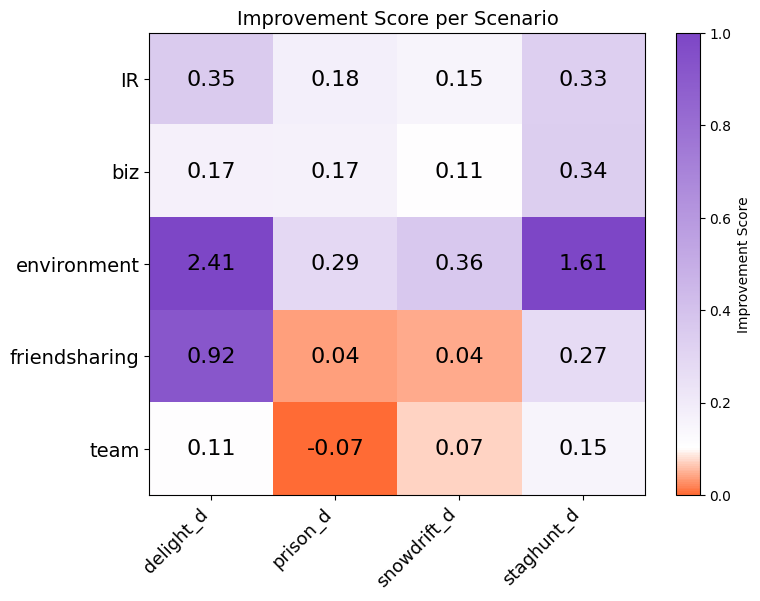

In [35]:
plt.figure(figsize=(8,6))

mid_blue = (0.4, 0.25, 0.5) 

cmap3 = LinearSegmentedColormap.from_list(
    'orange_blue_mid', 
    [
        (0.00, '#FF6B35'),
        (0.1, '#FFFFFF'),
        (1.00, '#7D46C6')
    ]
)

colors = ['#303633', '#35D65D']
cmap = LinearSegmentedColormap.from_list('gray_blue', colors)

plt.imshow(pivot, cmap=cmap3, vmin=0, vmax=1, aspect='auto')
for (i, j), val in np.ndenumerate(pivot):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black', fontsize=16)

plt.colorbar(label='Improvement Score')
plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right', fontsize=13)
plt.yticks(range(len(pivot.index)), pivot.index, fontsize=14)
plt.title('Improvement Score per Scenario', fontsize=14)
plt.savefig(os.path.join("../new_figs", "improvement_heatmap_oos_game.png"), bbox_inches='tight', dpi=600)
plt.show()